<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Project <br>
<font color=696880 size=4>
    Project Team
    
    
____


### Full Name : Zahra Soukhtedel, Lachin Naghashyar
### Student Number : 98105138, 98110179
___

# Introduction

In this project, we are going to have a brief and elementary hands-on real-world project, predicting breast cancer survival using machine learning models with clinical data and gene expression profiles.

In [ ]:
!pip install umap
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=b578e2f166753425c37f4fee239b7d98fdd60d7b3abaed44719bf4c5c14f364a
  Stored in directory: /root/.cache/pip/wheels/d4/13/91/2e752dc8dab5df027854bd33d2b65e1dc5cdc107fd1133990f
Successfully built umap
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=3e2c473a051dc23c3e401a0718955387f0682d1f9a133092bb57105bdaebf5b2
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a2

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from pandas.core.reshape.tile import Categorical
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import umap.umap_ as um
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from yellowbrick.model_selection import feature_importances
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.impute import SimpleImputer

# Data Documentation

For this purpose, we will use "Breast Cancer Gene Expression Profiles (METABRIC)" data.
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "_mut" at the end of the names of the columns)
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).

# Data Preparation (15 Points)


In this section you must first split data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset. (We will not use this dataset in further steps of the project)

## Data Loading & Splitting

#### Load Dataset

In [ ]:
def categorical_to_numerical(df):
    for name, values in df.iteritems():
      if values.dtypes == "object":
        le = preprocessing.LabelEncoder()
        le.fit(df[name])
        df[name] = le.transform(df[name])


# load dataset
df = pd.read_csv('METABRIC_RNA_Mutation.csv')

# remove mutation columns form dataset
mutation = df.filter(regex='_mut')
df = df[list(set(df.columns)-set(mutation.columns))]


In [ ]:
# split dataset into clinical and epression datas
label = df['overall_survival'].copy()
df = df.drop('overall_survival', axis='columns').drop('death_from_cancer', axis='columns')
clinical = (df.iloc[:, 0:31]) # clinical dataset
clinical = clinical.assign(overall_survival=label)
expression = (df.iloc[:, 31:]) # expression dataser
expression = expression.assign(overall_survival=label)

## EDA

For each dataset, you must perform a sufficient EDA.

EDA for clinical

In [ ]:
clinical

,braf,tg,ep300,src,cyp11a1,tsc1,cellularity,erbb4,kdr,ctnna3,...,shank2,tgfb3,ar,cyp2c8,er_status,smad9,sgcd,spaca1,myo1a,overall_survival
0,-0.6387,-1.2637,1.5090,-1.0737,2.3311,0.0623,NaN,0.2415,2.7183,0.2311,...,-0.1317,-1.4828,-0.3513,0.2242,Positive,-0.7776,0.3185,-0.0393,-1.3288,1
1,0.5886,-0.5201,-0.4294,-0.3297,-0.2053,0.8054,High,0.0059,-0.9864,-0.8015,...,-0.4393,0.4945,0.4480,0.4754,Positive,0.1040,0.7896,-0.6883,-0.9760,1
2,0.7275,-0.8488,-1.5670,-0.7181,-0.7445,-0.9652,High,-0.4383,-0.4649,-0.0799,...,1.0082,1.1768,-0.0780,1.3501,Positive,-0.8081,2.0649,0.0532,-1.1474,0
3,0.2123,-0.2497,-1.7947,-0.3804,-0.5875,-0.6103,Moderate,-0.5122,-1.2923,-0.8569,...,0.8421,1.0085,-1.7853,-0.4249,Positive,-1.8264,0.5162,0.2254,-0.2572,1
4,-0.2628,-0.3768,-0.5688,0.9720,-1.1262,-0.7420,High,-1.0922,-1.7323,0.2764,...,-0.1429,-0.9729,-0.6808,-0.5863,Positive,-0.7889,-0.1148,0.1099,-0.1359,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,-0.5040,0.3157,-0.3474,-1.4031,0.1191,-0.2158,High,0.5823,1.1456,-1.2906,...,-1.0035,1.1754,-0.1945,-0.5502,Positive,-0.5658,2.2016,-0.1370,-0.0647,1
1900,-0.7488,0.5994,0.1377,0.5690,-0.4499,0.1450,High,0.0857,0.7457,-0.9211,...,-1.1467,0.8659,0.0103,-0.8337,Positive,-1.2336,-0.0076,-0.0118,-1.6584,0
1901,0.5098,-0.4126,0.0061,-0.6542,-0.2403,-1.6078,High,-0.1998,-1.1868,0.3254,...,-1.1045,-1.4053,1.1062,-0.4577,Positive,-1.5524,0.1534,-0.0668,0.2390,0
1902,0.2045,-0.5726,-0.7979,-0.1731,-0.4617,0.2223,Moderate,0.7534,-0.0663,0.2355,...,0.1856,-0.6106,-0.2961,0.1532,Positive,-0.2902,-0.4712,-0.9161,-0.0624,0


In [ ]:
clinical.head()

,braf,tg,ep300,src,cyp11a1,tsc1,cellularity,erbb4,kdr,ctnna3,...,shank2,tgfb3,ar,cyp2c8,er_status,smad9,sgcd,spaca1,myo1a,overall_survival
0,-0.6387,-1.2637,1.5090,-1.0737,2.3311,0.0623,NaN,0.2415,2.7183,0.2311,...,-0.1317,-1.4828,-0.3513,0.2242,Positive,-0.7776,0.3185,-0.0393,-1.3288,1
1,0.5886,-0.5201,-0.4294,-0.3297,-0.2053,0.8054,High,0.0059,-0.9864,-0.8015,...,-0.4393,0.4945,0.4480,0.4754,Positive,0.1040,0.7896,-0.6883,-0.9760,1
2,0.7275,-0.8488,-1.5670,-0.7181,-0.7445,-0.9652,High,-0.4383,-0.4649,-0.0799,...,1.0082,1.1768,-0.0780,1.3501,Positive,-0.8081,2.0649,0.0532,-1.1474,0
3,0.2123,-0.2497,-1.7947,-0.3804,-0.5875,-0.6103,Moderate,-0.5122,-1.2923,-0.8569,...,0.8421,1.0085,-1.7853,-0.4249,Positive,-1.8264,0.5162,0.2254,-0.2572,1
4,-0.2628,-0.3768,-0.5688,0.9720,-1.1262,-0.7420,High,-1.0922,-1.7323,0.2764,...,-0.1429,-0.9729,-0.6808,-0.5863,Positive,-0.7889,-0.1148,0.1099,-0.1359,0


In [ ]:
clinical.describe()

,braf,tg,ep300,src,cyp11a1,tsc1,erbb4,kdr,ctnna3,taf1,...,smad3,shank2,tgfb3,ar,cyp2c8,smad9,sgcd,spaca1,myo1a,overall_survival
count,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1904.000000
mean,4.201681e-07,-1.575630e-07,-3.151261e-07,-3.676471e-07,6.302521e-07,-4.726891e-07,-7.352941e-07,6.302521e-07,5.777311e-07,1.050420e-07,...,-4.201681e-07,7.352941e-07,-2.100840e-07,8.928571e-07,-7.878151e-07,4.726891e-07,6.302521e-07,-0.000001,3.676471e-07,0.420693
std,1.000262e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000263e+00,1.000262e+00,1.000264e+00,1.000263e+00,1.000263e+00,1.000263e+00,...,1.000262e+00,1.000263e+00,1.000264e+00,1.000263e+00,1.000263e+00,1.000262e+00,1.000262e+00,1.000263,1.000262e+00,0.493800
min,-2.538300e+00,-3.127600e+00,-4.375800e+00,-3.250600e+00,-2.498500e+00,-3.248300e+00,-2.606700e+00,-2.922100e+00,-3.456800e+00,-3.228700e+00,...,-3.031600e+00,-2.276400e+00,-2.996400e+00,-2.299500e+00,-1.988900e+00,-2.660900e+00,-2.095800e+00,-3.600300,-2.785900e+00,0.000000
25%,-6.613750e-01,-6.697000e-01,-6.625750e-01,-6.971250e-01,-6.545000e-01,-6.443500e-01,-6.452250e-01,-6.735250e-01,-6.741250e-01,-6.443000e-01,...,-6.768000e-01,-6.612750e-01,-6.514500e-01,-6.153000e-01,-5.535250e-01,-6.958250e-01,-7.425500e-01,-0.637600,-6.291750e-01,0.000000
50%,-1.390500e-01,-7.865000e-02,-1.405000e-02,-7.170000e-02,-1.631500e-01,1.560000e-02,-6.345000e-02,-5.645000e-02,-7.650000e-03,2.640000e-02,...,-6.260000e-02,-8.280000e-02,6.490000e-02,1.134000e-01,-2.117500e-01,-8.800000e-02,-1.578000e-01,-0.037350,-6.445000e-02,0.000000
75%,5.286250e-01,5.398000e-01,6.872000e-01,6.416250e-01,4.548000e-01,6.921250e-01,5.733500e-01,6.372250e-01,6.372000e-01,6.409000e-01,...,6.037250e-01,5.165750e-01,7.305250e-01,7.255750e-01,2.608750e-01,5.774250e-01,5.550250e-01,0.621275,5.266750e-01,1.000000
max,5.564500e+00,1.024660e+01,3.309700e+00,3.881200e+00,6.848400e+00,3.591700e+00,6.158100e+00,5.408300e+00,5.333200e+00,3.733000e+00,...,5.824400e+00,5.448900e+00,2.406700e+00,4.262900e+00,1.189160e+01,5.406600e+00,5.924000e+00,5.412800,1.207050e+01,1.000000


In [ ]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   braf              1904 non-null   float64
 1   tg                1904 non-null   float64
 2   ep300             1904 non-null   float64
 3   src               1904 non-null   float64
 4   cyp11a1           1904 non-null   float64
 5   tsc1              1904 non-null   float64
 6   cellularity       1850 non-null   object 
 7   erbb4             1904 non-null   float64
 8   kdr               1904 non-null   float64
 9   ctnna3            1904 non-null   float64
 10  taf1              1904 non-null   float64
 11  dnah2             1904 non-null   float64
 12  hsd17b11          1904 non-null   float64
 13  radio_therapy     1904 non-null   int64  
 14  lamb3             1904 non-null   float64
 15  map4              1904 non-null   float64
 16  rictor            1904 non-null   float64


In [ ]:
clinical.isnull( ).sum() # Return the number of missing values in each column.

braf                 0
tg                   0
ep300                0
src                  0
cyp11a1              0
tsc1                 0
cellularity         54
erbb4                0
kdr                  0
ctnna3               0
taf1                 0
dnah2                0
hsd17b11             0
radio_therapy        0
lamb3                0
map4                 0
rictor               0
ncor1                0
lfng                 0
muc16                0
ctbp1                0
smad3                0
shank2               0
tgfb3                0
ar                   0
cyp2c8               0
er_status            0
smad9                0
sgcd                 0
spaca1               0
myo1a                0
overall_survival     0
dtype: int64

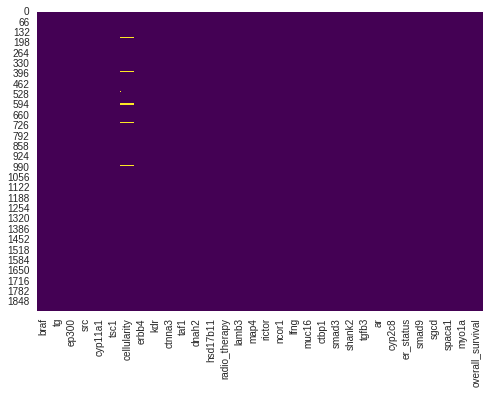

In [ ]:
sns.heatmap(clinical.isnull(),cbar=False,cmap='viridis')

We can see the dataset information, and it doesn't contain null data, and we can see the columns and data types of each. Since there exists rows with objects data type, we can perform data cleaning.
We can also get the summary of statistics:

#### Visualizing the missing values

Most commonly used function on NaN data, In order to drop a NaN values from a DataFrame, we use the dropna() function. This function drops rows/columns of data that have NaN values. dropna() - Drop rows with at least one NaN value.

In [ ]:
# convert categorical datatypes into numerical
categorical_to_numerical(clinical)

# impute null values for clinical data
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='mean')
clinical = pd.DataFrame(fill_NaN.fit_transform(clinical), columns=clinical.columns)

clinical.isnull().sum().sum()

0

check the correlation between different features

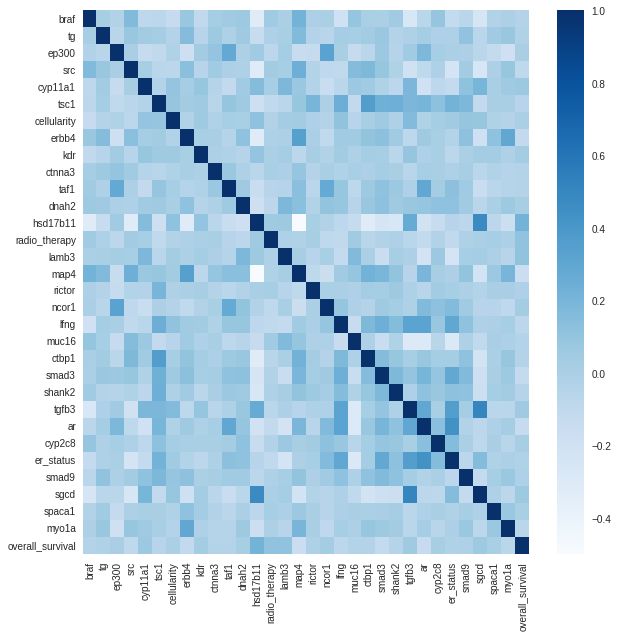

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(clinical.corr(),cbar=True,cmap='Blues')

### EDA for mutation

In [ ]:
mutation.head()

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### EDA for gene expression

In [ ]:
expression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 488 entries, dll1 to overall_survival
dtypes: float64(470), int64(4), object(14)
memory usage: 7.1+ MB


In [ ]:
expression

,dll1,ctcf,nras,diras3,abcc1,e2f6,gpr32,casp8,hes5,setd2,...,setdb1,mmp9,pdgfb,prkg1,bard1,map3k10,brca2,pik3r1,mapk3,overall_survival
0,0.6307,-0.4098,-0.3113,0.2883,-1.0213,-0.1167,0.2566,0.1816,0.9870,-0.7240,...,-1.3426,-2.3771,-0.0349,0.8269,-1.1201,-1.0700,-0.5738,2.0932,0.9809,1
1,-1.5476,0.2358,1.1293,0.6600,0.4261,-0.3793,-0.0545,1.8819,0.0066,1.0934,...,-1.0891,-1.3469,-0.3739,-0.9437,0.4390,0.4975,0.2777,-0.3072,-0.6298,1
2,-1.0439,-0.8201,1.7783,-0.1572,-0.5168,-0.3496,-1.0429,0.6432,-0.1830,-2.7355,...,-1.9798,-0.1297,-1.6093,-1.3318,-0.1721,0.2100,-0.8426,1.7297,-0.8799,0
3,0.4481,-0.6187,0.5188,0.2875,-1.4145,0.3869,-0.5610,-1.1012,-0.5077,-3.6153,...,-2.7271,-0.7623,-0.4251,1.2360,-0.4010,1.2555,-0.5428,-0.6674,1.3314,1
4,-1.2165,-0.1674,0.9580,-0.5542,-0.8794,1.1063,2.7664,1.8931,-0.3400,0.5528,...,-1.0253,-0.7551,-1.0203,-0.0193,0.6320,-0.5294,-0.9039,-1.1464,0.5779,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,-0.5568,-1.3172,1.0048,0.3773,-0.8873,-0.7368,0.8225,1.7063,-0.4389,-1.0565,...,-0.5810,-0.5305,-0.2295,-0.4350,-0.4606,-2.4348,0.5543,0.5322,-0.6935,1
1900,-1.0288,-0.5199,-0.0156,-0.9537,0.1139,0.8467,-0.4492,-0.2765,-0.8918,-2.2785,...,-0.0157,-0.1542,0.7618,-2.5314,-0.4134,2.4373,0.9128,0.2281,-0.4088,0
1901,-0.9833,1.1125,-0.1524,-1.0115,-0.6231,0.2522,-0.9190,2.3513,-0.8329,-0.3653,...,1.4356,-0.7885,-0.4153,-2.0806,-0.1206,0.8019,-0.2608,-1.4297,2.2604,0
1902,-1.3670,-0.0022,0.3849,-0.5320,-0.9997,-0.7404,-0.9214,2.9647,-0.9549,-0.2795,...,-0.8112,0.3839,-0.4523,1.4505,-0.2744,0.7998,-1.7695,-0.3427,0.0691,0


In [ ]:
print("num of null values : " , expression.isnull( ).sum().sum())

num of null values :  1045


#### Visualizing missing values

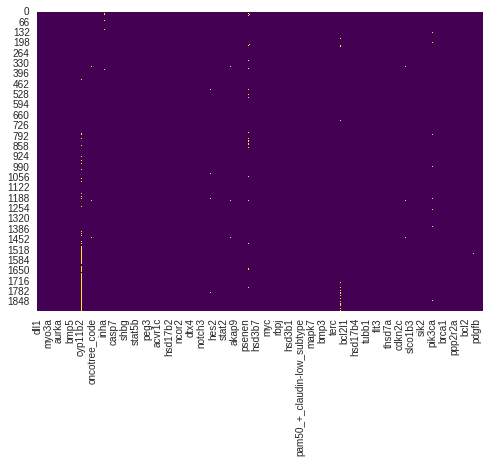

In [ ]:
sns.heatmap(expression.isnull(),cbar=False,cmap='viridis')

In [ ]:
# convert categorical datatypes into numerical
categorical_to_numerical(expression)

# impute null values for clinical data
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='mean')
expression = pd.DataFrame(fill_NaN.fit_transform(expression), columns=expression.columns)

print("after : ", expression.isnull( ).sum().sum())

after :  0


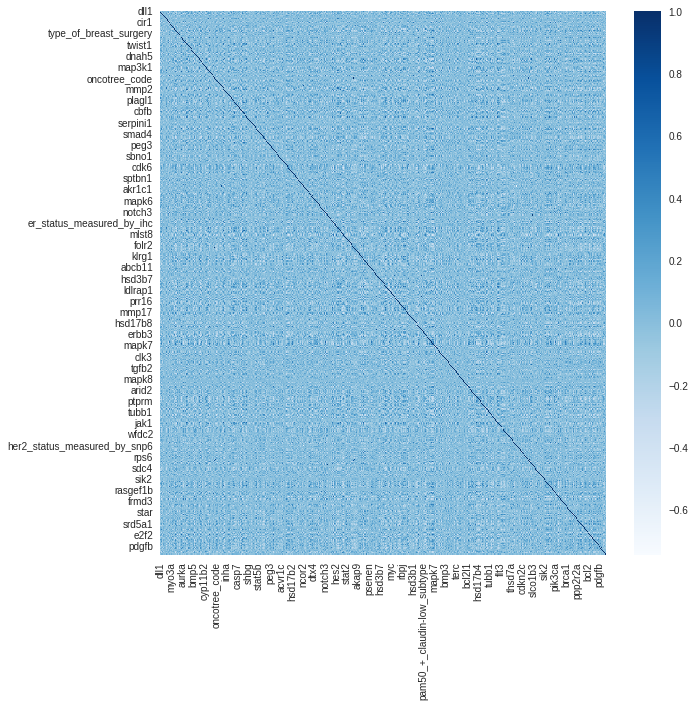

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(expression.corr(),cbar=True,cmap='Blues')

## Dimension Reduction (20 + Up to 10 Points Optional)

For each dataset, investigate whether it is needed to use a dimensionality reduction approach or not. If yes, please reduce the dataset's dimension. You can use UMAP for this purpose but any other approach is acceptable. Finding the most important features contains extra points.

### investigating the necessity of dimensionality reduction

We use dimensionality reduction techniques to speed up learning (many features lead to longer computations) and compress data (many features take a lot of disk/memory space). In this view, you should reduce dimensions only if running time or data size is "unacceptable", and you reduce the feature space until things become "acceptable".

In large datasets, very often the variables are highly correlated. The very purpose of applying dimension reduction techniques to identify those highly correlated variables or variables which are not related to the target variable and drop them out from further analysis.

Having highly correlated variables leads to overfitting and hence the accuracy of the model will suffer. So it is good to do the dimension reduction wherever possible.

However, if there is little correlation among the variables and all of them are bringing in new information, you should keep all the variables in the mix and build a model.

Clinical dataset has 31 features however, expressions dataset has around 500. This way, we can infer that we definately need to reduce the featres in the expression dataset not only because the optimization takes longer, but also because you might not have enough data to constrain your parameters, which would lead to overfitting.

As mentioned above, we can also calculate the correlation between features to decide wheter we should perform dimensionality reduction or not.

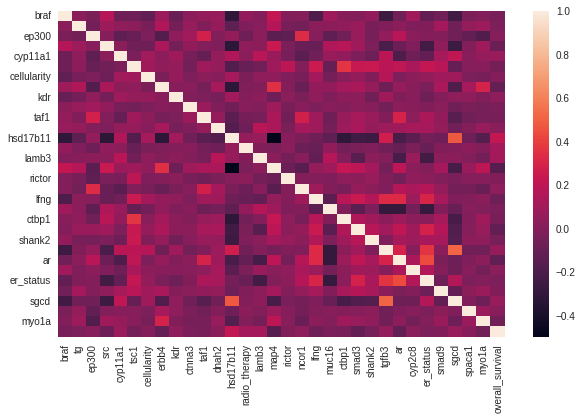

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(clinical.corr(), ax=ax)

,dll1,ctcf,nras,diras3,abcc1,e2f6,gpr32,casp8,hes5,setd2,...,setdb1,mmp9,pdgfb,prkg1,bard1,map3k10,brca2,pik3r1,mapk3,overall_survival
dll1,1.000000,0.084452,-0.088036,0.135724,0.005460,0.028993,0.032672,-0.000748,0.041822,0.114013,...,-0.049517,0.050838,0.072784,-0.032631,-0.195187,-0.056889,0.014262,0.205128,-0.057981,0.057841
ctcf,0.084452,1.000000,0.031410,-0.058019,0.160073,0.004768,0.016136,0.068463,-0.039159,0.290057,...,0.063474,0.048153,0.071716,-0.106457,0.048384,-0.109868,-0.147516,-0.127718,0.070837,-0.032411
nras,-0.088036,0.031410,1.000000,-0.107968,0.049680,-0.011770,0.003462,0.189740,-0.077456,-0.284500,...,-0.166629,0.220199,-0.152071,-0.058322,0.098659,-0.043053,0.098530,-0.265570,-0.222104,0.093655
diras3,0.135724,-0.058019,-0.107968,1.000000,-0.105020,-0.012149,-0.011670,0.046271,0.021732,0.023155,...,-0.039428,-0.178072,-0.154909,-0.061363,-0.204176,-0.069461,-0.040886,0.200884,-0.040772,0.085310
abcc1,0.005460,0.160073,0.049680,-0.105020,1.000000,0.028205,0.019569,-0.010539,-0.011597,0.107059,...,0.178609,0.226610,0.109703,-0.040797,0.118800,-0.044355,0.016910,-0.209705,0.042539,-0.026152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
map3k10,-0.056889,-0.109868,-0.043053,-0.069461,-0.044355,-0.000318,0.008527,-0.045032,0.121424,-0.080919,...,-0.028763,0.015781,-0.008789,0.234026,-0.071667,1.000000,0.034602,-0.047851,0.018163,0.019002
brca2,0.014262,-0.147516,0.098530,-0.040886,0.016910,-0.006710,0.000917,-0.079992,0.027411,-0.123566,...,-0.007538,0.119323,0.014844,-0.028743,0.062778,0.034602,1.000000,-0.020435,-0.079218,-0.000060
pik3r1,0.205128,-0.127718,-0.265570,0.200884,-0.209705,-0.017500,0.034135,0.090260,-0.016423,0.095314,...,-0.092247,-0.210187,-0.174046,-0.026490,-0.121968,-0.047851,-0.020435,1.000000,0.002784,0.017584
mapk3,-0.057981,0.070837,-0.222104,-0.040772,0.042539,-0.055315,0.000305,-0.103934,-0.021061,0.086396,...,-0.013284,-0.157681,0.168006,0.014749,-0.039744,0.018163,-0.079218,0.002784,1.000000,-0.030068


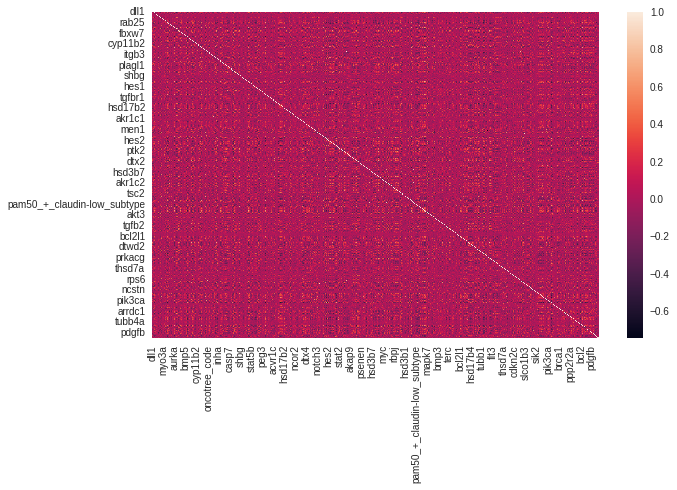

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(expression.corr(), ax=ax)
expression.corr()

Before we can do any work with the data it will help to clean up it a little. We won’t need NAs, we just want the measurement columns, and since the measurements are on entirely different scales it will be helpful to convert each feature into z-scores (number of standard deviations from the mean) for comparability. Then we need to train our reducer, letting it learn about the manifold. For this UMAP follows the sklearn API and has a method fit which we pass the data we want the model to learn from.

In [ ]:
def reduce(expression):
  reducer = um.UMAP()
  scaled_data = StandardScaler().fit_transform(expression)
  embedding = reducer.fit_transform(scaled_data)
  return embedding

The result is an array with 1092 samples, but only two feature columns (instead of the four we started with). This is because, by default, UMAP reduces down to 2D.

In [ ]:
def plot(embedding, expression):
  plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[int(x)] for x in expression['overall_survival']])
  plt.gca().set_aspect('equal', 'datalim')
  plt.title('UMAP projection of the expression dataset', fontsize=24);

### select the most important features

#### 1. backward elimination

This method eliminates (removes) features from a dataset through a recursive feature elimination (RFE) process. The algorithm first attempts to train the model on the initial set of features in the dataset and calculates the performance of the model (usually, accuracy score for a classification model and RMSE for a regression model). Then, the algorithm drops one feature (variable) at a time, trains the model on the remaining features and calculates the performance scores. The algorithm repeats eliminating features until it detects a small (or no) change in the performance score of the model and stops there!

In [ ]:
# y = expression['overall_survival']
# X = expression.drop("overall_survival", axis='columns')

# estimator = RandomForestClassifier(n_estimators=100)
# selector = RFE(estimator, n_features_to_select=5, step=1)
# selector.fit(X, y)
# X_selected = selector.transform(X)

#### 2. Forward Selection

This method can be considered as the opposite process of backward elimination. Instead of eliminating features recursively, the algorithm attempts to train the model on a single feature in the dataset and calculates the performance of the model (usually, accuracy score for a classification model and RMSE for a regression model). Then, the algorithm adds (selects) one feature (variable) at a time, trains the model on those features and calculates the performance scores. The algorithm repeats adding features until it detects a small (or no) change in the performance score of the model and stops there!

In [ ]:
# X_selected = SelectKBest(f_classif, k=10).fit_transform(X, y)
# X_selected = pd.DataFrame(X_selected, columns = [str(i) for i in range(10)])
# new_expression = X_selected.assign(overall_survival=y).astype("float16")
# gg = reduce(new_expression)
# plot(gg, new_expression)

#### 3. Random forests


Random forests is a tree-based model which is widely used for regression and classification tasks on non-linear data. It can also be used for feature selection with its built-in feature_importances_ attribute which calculates feature importance scores for each feature based on the ‘gini’ criterion (a measure of the quality of a split of internal nodes) while training the model.

Scikit-learn SelectFromModel selects only the features whose importance is greater or equal to the specified threshold value.

AxesSubplot(0.125,0.125;0.775x0.755)
Data with initial features
     dll1    ctcf    nras  diras3   abcc1    e2f6   gpr32   casp8    hes5  \
0  0.6307 -0.4098 -0.3113  0.2883 -1.0213 -0.1167  0.2566  0.1816  0.9870   
1 -1.5476  0.2358  1.1293  0.6600  0.4261 -0.3793 -0.0545  1.8819  0.0066   
2 -1.0439 -0.8201  1.7783 -0.1572 -0.5168 -0.3496 -1.0429  0.6432 -0.1830   
3  0.4481 -0.6187  0.5188  0.2875 -1.4145  0.3869 -0.5610 -1.1012 -0.5077   
4 -1.2165 -0.1674  0.9580 -0.5542 -0.8794  1.1063  2.7664  1.8931 -0.3400   

    setd2  ...  tumor_size  setdb1    mmp9   pdgfb   prkg1   bard1  map3k10  \
0 -0.7240  ...        22.0 -1.3426 -2.3771 -0.0349  0.8269 -1.1201  -1.0700   
1  1.0934  ...        10.0 -1.0891 -1.3469 -0.3739 -0.9437  0.4390   0.4975   
2 -2.7355  ...        15.0 -1.9798 -0.1297 -1.6093 -1.3318 -0.1721   0.2100   
3 -3.6153  ...        25.0 -2.7271 -0.7623 -0.4251  1.2360 -0.4010   1.2555   
4  0.5528  ...        40.0 -1.0253 -0.7551 -1.0203 -0.0193  0.6320  -0.5294   

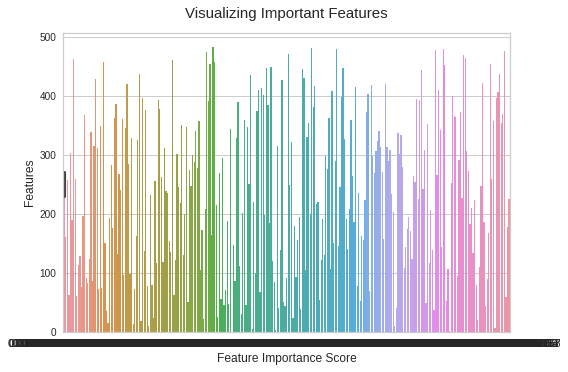

In [ ]:
from sklearn.feature_selection import SelectFromModel

y = expression['overall_survival']
label = y.astype('int')
X = expression.drop("overall_survival", axis='columns')

rf = RandomForestClassifier(n_estimators=100, max_depth=3,
                                 bootstrap=True, n_jobs=-1,
                                 random_state=0)
rf.fit(X, y)

feature_imp = pd.Series(rf.feature_importances_).sort_values(ascending=False)

print(sns.barplot(x=feature_imp, y=feature_imp.index))
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Important Features", fontsize=15, pad=15)

selector = SelectFromModel(rf, threshold=0.013)
features_important = selector.fit_transform(X, y)

print('Data with initial features')
print(pd.DataFrame(X).head())
print()
print('Data with selected features')
print(pd.DataFrame(features_important).head())

new_expression = pd.DataFrame(features_important).assign(overall_survival=label)
labl = new_expression['overall_survival']
print(new_expression)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


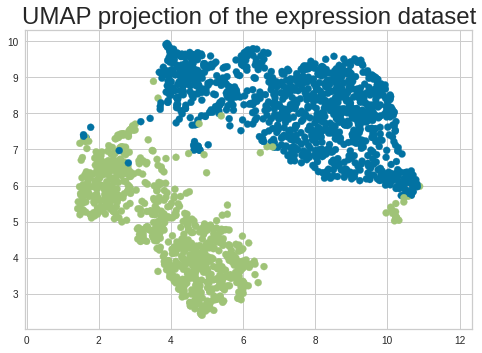

In [ ]:
reduced_expression = reduce(new_expression)
plot(reduced_expression, new_expression)

# Classic Model (25 Points)

In this section, you must implement a classic classification model for clinical, gene expressions, and reduced gene expressions datasets. Using Random Forest is suggested. (minimum acceptable accuracy = 60%)

####classification model for clinical dataset using Random Forest:

In [ ]:
def random_forest_classificaion(X, y, name):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5) # 70% training and 30% test
  clf=RandomForestClassifier(n_estimators=100)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print("Accuracy of Random Forest model witch trained over {} data is : {}".format(name, metrics.accuracy_score(y_test, y_pred)))
  return clf

clinical_y = clinical['overall_survival']
clinical_X = clinical.drop("overall_survival", axis='columns')
expression_y = expression['overall_survival']
expression_X = expression.drop('overall_survival', axis='columns')

print(reduced_expression)
reduced_expression_y = labl
reduced_expression_X = reduced_expression


random_forest_classificaion(clinical_X, clinical_y, "clinical")
random_forest_classificaion(expression_X, expression_y, "gene expression")
random_forest_classificaion(reduced_expression_X, reduced_expression_y, "reduced gene expression")

[[2.942608  7.656014 ]
 [2.493001  6.3550286]
 [1.6523864 7.3267775]
 ...
 [6.7059155 8.318012 ]
 [6.6358175 8.2115345]
 [6.268778  8.65573  ]]
Accuracy of Random Forest model witch trained over clinical data is : 0.6153846153846154
Accuracy of Random Forest model witch trained over gene expression data is : 0.7167832167832168
Accuracy of Random Forest model witch trained over reduced gene expression data is : 0.9895104895104895


RandomForestClassifier()

# Neural Network (30 Points)

In this section, you must implement a neural network model for clinical, gene expressions and reduced gene expressions datasets. Using the MPL models is suggested. (minimum acceptable accuracy = 60%)

In [ ]:
def MLPClassification(X, y, a, b):
  clf = MLPClassifier(hidden_layer_sizes=(a, b),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.001)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5) # 70% training and 30% test
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  return clf, accuracy_score(y_test,y_pred)

Iteration 1, loss = 0.89139164
Iteration 2, loss = 0.86671830
Iteration 3, loss = 0.84326085
Iteration 4, loss = 0.82245425
Iteration 5, loss = 0.80391128
Iteration 6, loss = 0.78807324
Iteration 7, loss = 0.77258064
Iteration 8, loss = 0.76021792
Iteration 9, loss = 0.74841644
Iteration 10, loss = 0.73871600
Iteration 11, loss = 0.72901291
Iteration 12, loss = 0.72115547
Iteration 13, loss = 0.71436079
Iteration 14, loss = 0.70804542
Iteration 15, loss = 0.70269088
Iteration 16, loss = 0.69785085
Iteration 17, loss = 0.69367339
Iteration 18, loss = 0.69005093
Iteration 19, loss = 0.68676626
Iteration 20, loss = 0.68405108
Iteration 21, loss = 0.68176584
Iteration 22, loss = 0.67960503
Iteration 23, loss = 0.67766268
Iteration 24, loss = 0.67587188
Iteration 25, loss = 0.67424994
Iteration 26, loss = 0.67277245
Iteration 27, loss = 0.67137749
Iteration 28, loss = 0.67017992
Iteration 29, loss = 0.66894949
Iteration 30, loss = 0.66794408
Iteration 31, loss = 0.66690800
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


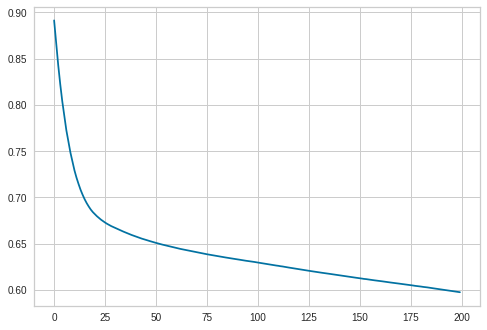

In [ ]:
clf1, acc1 = MLPClassification(clinical_X, clinical_y, 5, 2)
print("Accuracy of MLP model witch trained over {} data is : {}".format("clinical", acc1))

plt.plot(clf1.loss_curve_)
plt.show()


Iteration 1, loss = 8.17336872
Iteration 2, loss = 4.50280830
Iteration 3, loss = 2.43144303
Iteration 4, loss = 2.96115446
Iteration 5, loss = 2.98301922
Iteration 6, loss = 2.73873787
Iteration 7, loss = 1.87555122
Iteration 8, loss = 1.49200751
Iteration 9, loss = 0.90764575
Iteration 10, loss = 0.70325123
Iteration 11, loss = 0.70034362
Iteration 12, loss = 0.43641366
Iteration 13, loss = 0.48598000
Iteration 14, loss = 0.59038772
Iteration 15, loss = 0.69322203
Iteration 16, loss = 0.81205803
Iteration 17, loss = 0.94638486
Iteration 18, loss = 1.02450447
Iteration 19, loss = 0.86253253
Iteration 20, loss = 0.42625037
Iteration 21, loss = 0.37592533
Iteration 22, loss = 0.45110318
Iteration 23, loss = 0.32716904
Iteration 24, loss = 1.05972919
Iteration 25, loss = 2.26989012
Iteration 26, loss = 2.81739041
Iteration 27, loss = 2.40934017
Iteration 28, loss = 1.24566850
Iteration 29, loss = 0.71587010
Iteration 30, loss = 0.61349440
Iteration 31, loss = 0.59786151
Iteration 32, los

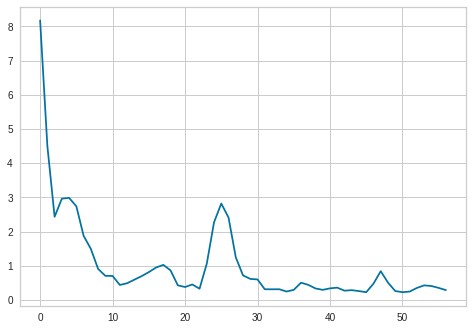

In [ ]:
clf2, acc2 = MLPClassification(expression_X, expression_y, 100, 50)
plt.plot(clf2.loss_curve_)
print("Accuracy of MLP model witch trained over {} data is : {}".format("gene expression", acc2))


Iteration 1, loss = 0.76774573
Iteration 2, loss = 0.75714493
Iteration 3, loss = 0.74799551
Iteration 4, loss = 0.74045184
Iteration 5, loss = 0.73406829
Iteration 6, loss = 0.72840234
Iteration 7, loss = 0.72304526
Iteration 8, loss = 0.71779024
Iteration 9, loss = 0.71213393
Iteration 10, loss = 0.70661946
Iteration 11, loss = 0.70047788
Iteration 12, loss = 0.69443628
Iteration 13, loss = 0.68817031
Iteration 14, loss = 0.68198072
Iteration 15, loss = 0.67557305
Iteration 16, loss = 0.66889983
Iteration 17, loss = 0.66227856
Iteration 18, loss = 0.65562708
Iteration 19, loss = 0.64877827
Iteration 20, loss = 0.64188699
Iteration 21, loss = 0.63495527
Iteration 22, loss = 0.62789076
Iteration 23, loss = 0.62022500
Iteration 24, loss = 0.61241110
Iteration 25, loss = 0.60428870
Iteration 26, loss = 0.59536306
Iteration 27, loss = 0.58563159
Iteration 28, loss = 0.57490405
Iteration 29, loss = 0.56391663
Iteration 30, loss = 0.55154793
Iteration 31, loss = 0.53940289
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP model witch trained over reduced gene expression data is : 0.993006993006993


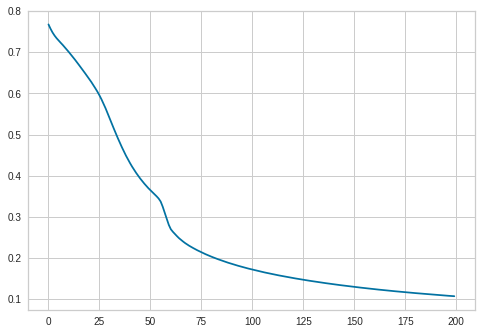

In [ ]:
clf3, acc3 = MLPClassification(reduced_expression, labl, 5, 3)
plt.plot(clf3.loss_curve_)
print("Accuracy of MLP model witch trained over {} data is : {}".format("reduced gene expression", acc3))


# Model Comparison (10 Points)

Compare different models and different datasets (clinical, gene expressions, and gene reduced expressions) and try to explain their differences.

Random Forest and Neural Network are the two widely used machine-learning algorithms. What is the difference between the two approaches?

The RF can only work with tabular data. On the other hand, NN can work with many different data types such as Tabular data, Images, Audio data, Text data and etc.

In our case that we're working with tabular data, we should check both algorithms and select the better one.

**RF Vs. NN—Data Preprocessing:**

In theory, the RF should work with missing and categorical data. However, the Sklearn implementation doesn't handle this.
Data preprocessing for NN requires filling missing values and converting categorical data into numerical. What is more, there is a need for feature scaling. In the case of different ranges of features, there will be problems with model training.


**RF Vs. NN—Model training:**
For RF, you set the number of trees in the ensemble (which is quite easy because of the more trees in RF the better) and you can use default hyperparameters and it should work.

However, there are many more hyperparameters to set in NNs such as NN architecture. How many layers to use; usually 2 or 3 layers should be enough. How many neurons to use in each layer? What activation functions to use? What weights initialization to use?, ...


In conclusion, when working with tabular data, it is worth to check the Random Forests first because it is easier. If you are not satisfied with the model performance you should try to tune and train Neural Network. There are many hyperparameters which can be tuned in NN and if you have enough knowledge and experience you can obtain very good results with NN. However, NNs will require much more data than an everyday person might have on hand to actually be effective.

Also specificaly in our exmaple, we can compare the models on three different datasets that we have:


As expected **Random Forest** works better on the reduced gene expression dataset and clinical dataset. The reason for this is that they have fewer features in them.
On the other hand, **Neural Networks** work better on the gene expression dataset because it has lot more features in it and NNs have higher efficiency in handling and analyzing large volumes of data.